In [1]:

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
sns.set()
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Cleaning Data**

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

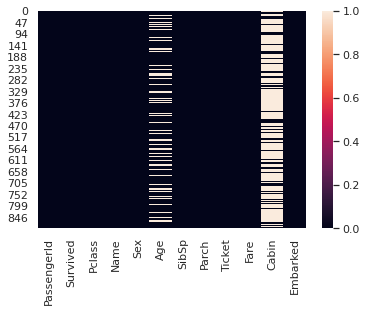

In [7]:
sns.set_theme(style='darkgrid')
sns.heatmap(train.isnull(), )

In [8]:
train.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [9]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [10]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
    
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

In [11]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

# **EDA**

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


<AxesSubplot:xlabel='Sex', ylabel='count'>

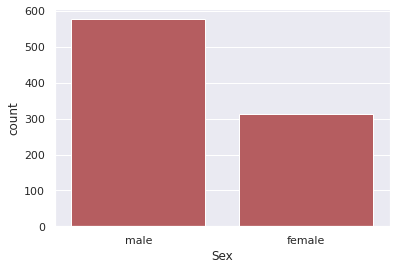

In [14]:
sns.countplot(x='Sex',
    hue=None,
    data=train,
    color='r')

Text(0.5, 1.0, 'People who Survived Based on Gender')

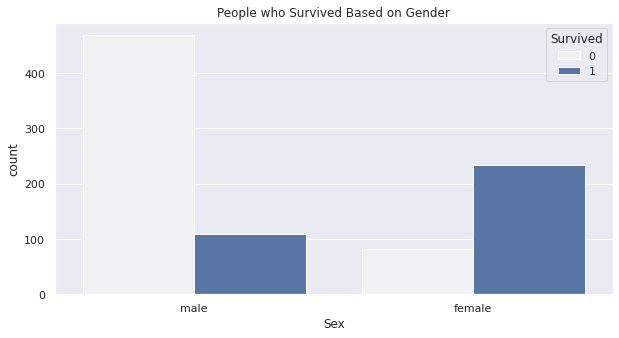

In [15]:
plt.figure(figsize=(10,5))

sns.countplot(x='Sex',
    data=train,
    color='b',
    hue='Survived',)

plt.title("People who Survived Based on Gender")

<AxesSubplot:xlabel='Survived', ylabel='count'>

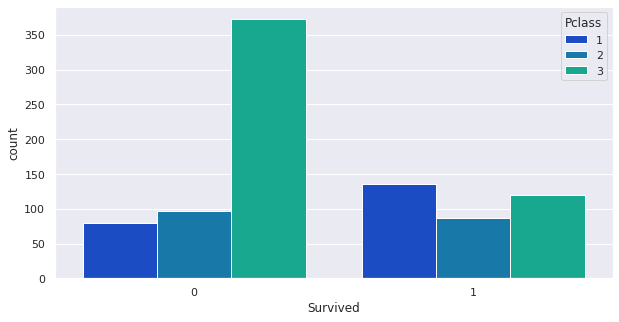

In [16]:
plt.figure(figsize=(10,5))

sns.countplot(x='Survived',hue='Pclass',data=train,palette='winter')

<Figure size 864x504 with 0 Axes>

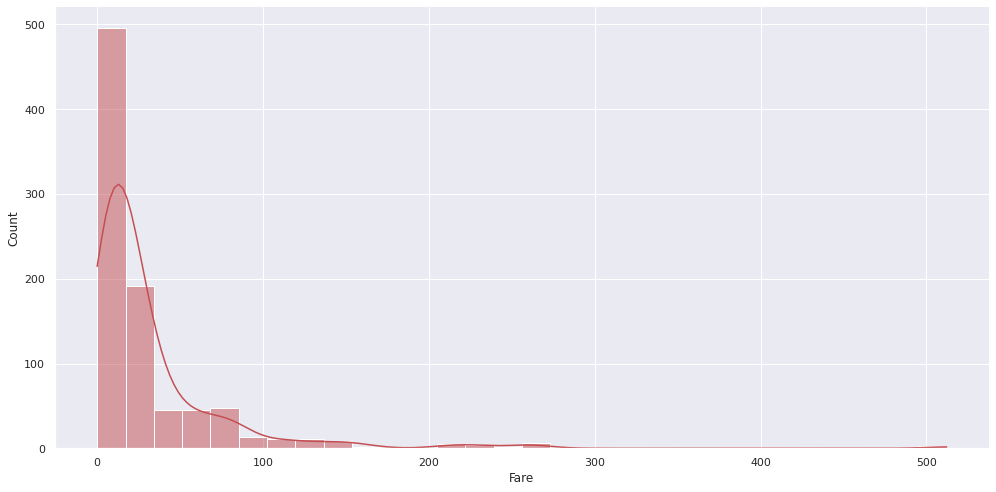

In [17]:
plt.figure(figsize=(12,7))
sns.displot(train['Fare'], bins=30,color='r',height=7,
    aspect=2, kde=True)
plt.show()

Text(0.5, 1.0, 'Boxplot of Passenger Ages Based on Class')

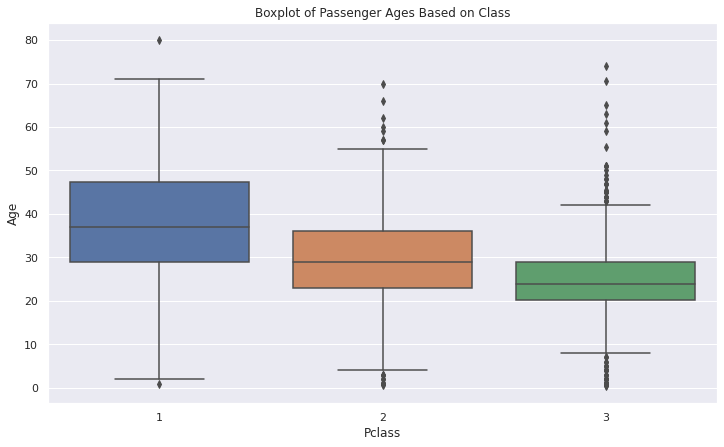

In [18]:
plt.figure(figsize=(12,7))

sns.boxplot(x='Pclass',
    y='Age',
    hue=None,
    data=train,
    )
plt.title("Boxplot of Passenger Ages Based on Class")

Text(0.5, 1.0, 'Number of Siblings and Spouses on Board')

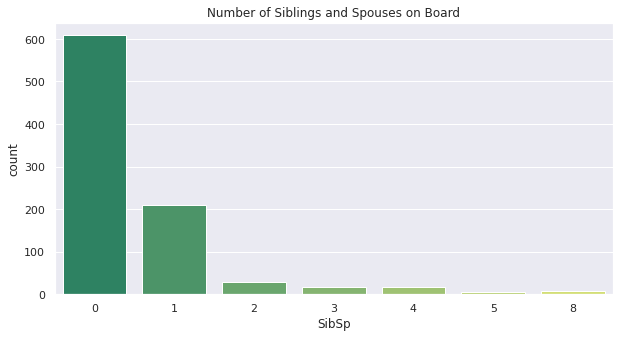

In [19]:
plt.figure(figsize=(10,5))

sns.countplot(x='SibSp',data=train,palette='summer')
plt.title("Number of Siblings and Spouses on Board")

<AxesSubplot:xlabel='Parch', ylabel='count'>

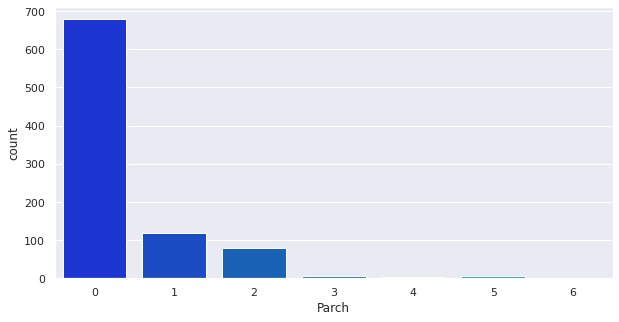

In [20]:
plt.figure(figsize=(10,5))

sns.countplot(x='Parch',data=train,palette='winter')

# **Training Data**

In [21]:
#changing sex column into binary data
lb = LabelEncoder()
train['Sex'] = lb.fit_transform(train['Sex'])
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,24.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [22]:
#changing sex column into binary data
lb = LabelEncoder()
test['Sex'] = lb.fit_transform(test['Sex'])
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,24.0,0,0,8.0500
414,1306,1,0,39.0,0,0,108.9000
415,1307,3,1,38.5,0,0,7.2500
416,1308,3,1,24.0,0,0,8.0500


In [23]:
test['Fare'].fillna(test['Fare'].mean(), inplace = True)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [24]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [25]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']]
y = train['Survived']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **Logistic Model Predictions and Submission**

In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
predictions = log_reg.predict(test.drop('PassengerId', axis = 1))

In [29]:
Submission = pd.DataFrame({'PassengerID': test.PassengerId, 'Survived': predictions})
Submission

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [30]:
Submission.to_csv('submission.csv', index=False)